In [1]:
# Import the Libraries
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import hstack

In [2]:
df = pd.read_csv("/content/train.tsv",sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


### Data Description

In [3]:
df.shape

(156060, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [6]:
df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [7]:
df['SentenceId'].value_counts()

1       63
5555    63
509     59
625     58
403     57
        ..
8451     1
5718     1
3560     1
1666     1
1178     1
Name: SentenceId, Length: 8529, dtype: int64

In [8]:
df['PhraseId'].value_counts()

2047     1
38200    1
44351    1
42302    1
48445    1
        ..
62155    1
64202    1
58057    1
60104    1
2049     1
Name: PhraseId, Length: 156060, dtype: int64

In [9]:
df.index

RangeIndex(start=0, stop=156060, step=1)

In [10]:
df.loc[0:1, :]['Phrase']

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
Name: Phrase, dtype: object

In [11]:
print(df['Phrase'][3])
print(df['Phrase'][4])

A
series


In [12]:
df.Phrase

0         A series of escapades demonstrating the adage ...
1         A series of escapades demonstrating the adage ...
2                                                  A series
3                                                         A
4                                                    series
                                ...                        
156055                                            Hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [13]:
pd.set_option('display.max_rows', 100)

In [14]:
df['SentenceId'].value_counts()

1       63
5555    63
509     59
625     58
403     57
        ..
8451     1
5718     1
3560     1
1666     1
1178     1
Name: SentenceId, Length: 8529, dtype: int64

## Exploratory Data Analysis

In [15]:
df['SentenceId'].value_counts().describe()

count    8529.000000
mean       18.297573
std         9.950209
min         1.000000
25%        11.000000
50%        17.000000
75%        25.000000
max        63.000000
Name: SentenceId, dtype: float64

In [16]:
df[df['SentenceId'] == 625]

,PhraseId,SentenceId,Phrase,Sentiment
14483,14484,625,Better than the tepid Star Trek : Insurrection...,2
14484,14485,625,Better than the tepid Star Trek : Insurrection ;,3
14485,14486,625,Better than the tepid Star Trek : Insurrection,3
14486,14487,625,Better than the tepid Star Trek :,3
14487,14488,625,Better than the tepid Star Trek,3
14488,14489,625,than the tepid Star Trek,2
14489,14490,625,the tepid Star Trek,2
14490,14491,625,tepid Star Trek,1
14491,14492,625,tepid,1
14492,14493,625,Star Trek,2


In [17]:
df.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [18]:
display(df['SentenceId'].value_counts())

1       63
5555    63
509     59
625     58
403     57
        ..
8451     1
5718     1
3560     1
1666     1
1178     1
Name: SentenceId, Length: 8529, dtype: int64

In [19]:
# Number of Pharase have for each sentence
temp=df.SentenceId.value_counts()
# descriptive Analysis of the SentenceId
display(temp.describe())

count    8529.000000
mean       18.297573
std         9.950209
min         1.000000
25%        11.000000
50%        17.000000
75%        25.000000
max        63.000000
Name: SentenceId, dtype: float64

Text(0.5, 0, 'Sentence')

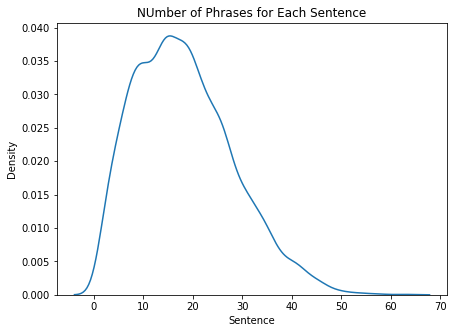

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.kdeplot(temp,label="Number of Phrases")
plt.title("NUmber of Phrases for Each Sentence")
plt.xlabel("Sentence")

In [21]:
import plotly.figure_factory as ff
import numpy as np

x = temp
hist_data = [x]
group_labels = ['Sentence Distribution'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

<img src="https://github.com/abkedar/Hands-on-ml-projects/blob/master/sentiment_analysis/images/Sentiment_Analysis_1.png" alt="Measuring the Skewness distribution of Sentiment " />
%%html
<a href="https://github.com/abkedar/Hands-on-ml-projects/blob/master/sentiment_analysis/images/Sentiment_Analysis_1.png">Measuring the Skewness distribution of Sentiment</a>

In [22]:
list(df['Sentiment'].value_counts())

[79582, 32927, 27273, 9206, 7072]

In [23]:
list(df['Sentiment'].unique())

[1, 2, 3, 4, 0]

In [24]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Pie(labels=df.Sentiment.value_counts().index, values=df['Sentiment'].value_counts())])
fig.show()

<img src="https://github.com/abkedar/Hands-on-ml-projects/blob/master/sentiment_analysis/images/Sentiment_Analysis_2.png" alt="Percentage wise distribution of Sentiments" />
%%html
<a href="https://github.com/abkedar/Hands-on-ml-projects/blob/master/sentiment_analysis/images/Sentiment_Analysis_2.png">Percentage wise distribution of Sentiments</a>

Text(0.5, 1.0, 'CDF')

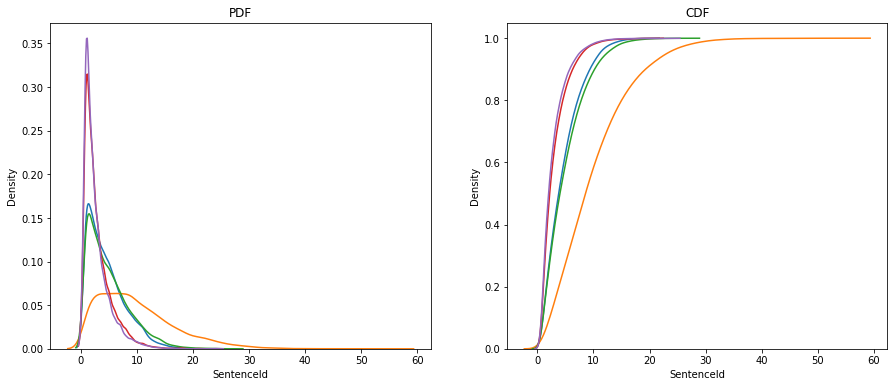

In [25]:
fig,[ax1,ax2]=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

for i in df.Sentiment.unique():
    a=df.loc[df.Sentiment==i]["SentenceId"].value_counts()
    sns.kdeplot(a,label="sentiment_"+str(i),ax=ax1)
    sns.kdeplot(a,label="sentiment_"+str(i),ax=ax2,cumulative=True)
ax1.set_title("PDF")
ax2.set_title("CDF")

In [26]:
# Mean value of pharases
means_phrase=[]
sentiment=[]
for i in df.Sentiment.unique():
    sentiment.append(i)
    means_phrase.append(df.loc[df.Sentiment==i]["SentenceId"].value_counts().mean())


In [27]:
import plotly.graph_objects as go

x = ['Product A', 'Product B', 'Product C']
y = [0, 1, 2, 3, 4]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=df['Sentiment'].unique(), y=means_phrase,
            text=y,
            textposition='auto',
        )])

fig.show()

<img src="https://github.com/abkedar/Hands-on-ml-projects/blob/master/sentiment_analysis/images/Sentiment_Analysis_3.png" alt="image info" />
%%html
<a href="https://github.com/abkedar/Hands-on-ml-projects/blob/master/sentiment_analysis/images/Sentiment_Analysis_3.png">number of Unique Sentiment dictribution of Phrase</a>

## Feature Engineering

In [28]:
import nltk
import string
import warnings
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


stem=PorterStemmer()
stop_words=set(stopwords.words('english'))
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
def Feature_engineering_1(text_data):
    f1=[len(text) for text in text_data]
    f2=[len(text.split()) for text in text_data]
    f3=[]
    for text in text_data:
        words=[word in stop_words for word in text.split()]
        f3.append(sum(words))
    f4=[]    
    for text in text_data:
        words=[word in string.punctuation for word in word_tokenize(text)]
        f4.append(sum(words))
    return f1,f2,f3,f4

def Feature_engineering_2(text_data):
    f1=[len(text) for text in text_data]
    f2=[len(text.split()) for text in text_data]
    return f1, f2

In [30]:
f1,f2,f3,f4=Feature_engineering_1(df.Phrase)
df["len"]=f1
df["num_words"]=f2
df["num_stopwords"]=f3
df["num_pun"]=f4

In [31]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment,len,num_words,num_stopwords,num_pun
0,1,1,A series of escapades demonstrating the adage ...,1,188,37,19,2
1,2,1,A series of escapades demonstrating the adage ...,2,77,14,7,0
2,3,1,A series,2,8,2,0,0
3,4,1,A,2,1,1,0,0
4,5,1,series,2,6,1,0,0


In [32]:
def Preprocess(phrase):
    #removing the spaces
    corpus=[]
    for text in phrase:
        text=text.lower()
        text=text.strip()
      #  text=re.sub(r"n't"," not",text)
      #  text=re.sub(r"n,t"," not",text)
        text=" ".join([stem.stem(i) for i in text.split()])
        corpus.append(text)
    return corpus

## Predictive Modeling:

### CountVectorizer & RandomForest

In [33]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [34]:
X = df.drop(['SentenceId'], axis=1)
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)

In [35]:
X_train.head()

,PhraseId,Phrase,Sentiment,len,num_words,num_stopwords,num_pun
94556,94557,gabbiest,2,8,1,0,0
30749,30750,... a sour little movie at its core ; an explo...,1,124,24,10,1
75613,75614,infusing into the story,2,23,4,2,0
127844,127845,The Komediant is a tale worth catching .,3,40,8,2,1
45225,45226,win many fans over the age of 12,2,32,8,3,0


In [36]:
print("The shape of the Training set :",X_train.shape,y_train.shape)
print("The shape of the Validation set :",X_test.shape,y_test.shape)

The shape of the Training set : (117045, 7) (117045,)
The shape of the Validation set : (39015, 7) (39015,)


In [37]:
train_text = Preprocess(X_train.Phrase)
test_text = Preprocess(X_test.Phrase)

In [38]:
f1,f2=Feature_engineering_2(train_text)
f11,f22=Feature_engineering_2(test_text)
X_train["f1"]=f1
X_train["f2"]=f2
X_test['f1']=f11
X_test['f2']=f22

### TfidfVectorizer on Text data

In [39]:
vectorizer=TfidfVectorizer(stop_words=None,ngram_range=(2,2),max_features=20000)

In [40]:
vectorizer.fit(train_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [41]:
train_tf_idf=vectorizer.transform(train_text)
test_tf_idf=vectorizer.transform(test_text)

### stacking the features with the dataset

In [42]:
train_tf_idf=hstack([train_tf_idf,X_train.iloc[:,[-6,-5,-2,-1]].values])
test_tf_idf=hstack([test_tf_idf,X_test.iloc[:,[-6,-5,-2,-1]].values])

In [43]:
train_tf_idf

<117045x20004 sparse matrix of type '<class 'numpy.float64'>'
	with 1533282 stored elements in COOrdinate format>

In [44]:
model_nb=MultinomialNB()
model_nb.fit(train_tf_idf,y_train)
y_test_pre=model_nb.predict(test_tf_idf)
y_train_pre=model_nb.predict(train_tf_idf)

print("The accuracy of Training Data :",accuracy_score(y_train,y_train_pre))
print("The accuracy of Testing Data :",accuracy_score(y_test,y_test_pre))

The accuracy of Training Data : 0.6435046349694562
The accuracy of Testing Data : 0.6010252466999871


### Prediction using RandomClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# implememt BAG OF WORDS
countVector = CountVectorizer(ngram_range=(2,2), max_features=100009)
#ngram(2,2) means it will combine the 2 words together and assign the value


trainDataset = countVector.fit_transform(train_text)

In [51]:
randomClassifier = RandomForestClassifier(n_estimators=20, criterion='entropy')
randomClassifier.fit(trainDataset, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
test_dataset = countVector.transform(test_text)
predictions = randomClassifier.predict(test_dataset)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

matrix = confusion_matrix(y_test, predictions)
print(matrix)
score = accuracy_score(y_test, predictions)
print(score)
report = classification_report(y_test, predictions)
print(report)

[[  667   712   370    17     2]
 [  659  2829  3087   230    13]
 [  153  1682 16076  1859   125]
 [   17   218  3650  3513   834]
 [    3    15   412   972   900]]
0.6147635524798154
              precision    recall  f1-score   support

           0       0.44      0.38      0.41      1768
           1       0.52      0.41      0.46      6818
           2       0.68      0.81      0.74     19895
           3       0.53      0.43      0.47      8232
           4       0.48      0.39      0.43      2302

    accuracy                           0.61     39015
   macro avg       0.53      0.48      0.50     39015
weighted avg       0.60      0.61      0.60     39015



## Predcitive Modeling using XGBBlassifier and CatBoosClassifier

In [55]:
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

In [61]:
max_features_num = [800]
ngram = [1,2,3,4,5]
for i in max_features_num:
    for j in ngram:
        countvector=CountVectorizer(ngram_range=(j,j),max_features=i)
        traindataset=countvector.fit_transform(train_text)
        test_dataset = countvector.transform(test_text)

        xgb = XGBClassifier(random_state =1)
        xgb.fit(pd.DataFrame(traindataset.todense(), columns=countvector.get_feature_names()),y_train)
        predictions = xgb.predict(pd.DataFrame(test_dataset.todense(), columns=countvector.get_feature_names()))
        score=accuracy_score(y_test,predictions)
        print('max number of features used : {}'.format(i))
        print('ngram_range ({},{})'.format(j,j))
        print(score)
        matrix=confusion_matrix(y_test,predictions)
        print('confusion matrix : {}'.format(matrix))
        print('===============================')

max number of features used : 800
ngram_range (1,1)
0.5367166474432911
confusion matrix : [[   73   214  1320   158     3]
 [   35   493  5898   385     7]
 [   12   203 19174   494    12]
 [    1    94  7008  1080    49]
 [    0    35  1557   590   120]]
max number of features used : 800
ngram_range (2,2)
0.5159810329360502
confusion matrix : [[   29    24  1707     5     3]
 [    8    82  6703    21     4]
 [    0    19 19828    39     9]
 [    0     8  8075   117    32]
 [    0     2  2174    51    75]]
max number of features used : 800
ngram_range (3,3)
0.5123926694860951
confusion matrix : [[   11     6  1744     2     5]
 [    3    19  6776     6    14]
 [    0     7 19847    22    19]
 [    0     0  8150    44    38]
 [    0     0  2224     8    70]]
max number of features used : 800
ngram_range (4,4)
0.5114699474561066
confusion matrix : [[   13     2  1748     2     3]
 [    3    14  6798     3     0]
 [    0    15 19867    10     3]
 [    0     4  8197    21    10]
 [    0   